# 2nd-order shift HG00-HG00, matching basis, waist at gapless Half-plane PD



In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

### input

In [12]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 100e-6  #100 micron shift

#alpha(10nrad)
alpha_min=-200e-6
alpha_max=200e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

In [13]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)

#shifts
def second_order_shift_num_r(alpha,a):
    result= (
                (np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                +
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_num_l(alpha,a):
    result= (
                -(np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                -
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_den(alpha,a):
    result= (
               a**2* (3/(2*w**2))
            )
    return(result)

#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                    +
                    second_order_shift_num_r(alpha,a)
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        +
                        second_order_shift_den(alpha,a)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
                +
                second_order_shift_num_l(alpha,a)
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    +
                    second_order_shift_den(alpha,a)
                )
        )
    )

a=10e-6
second_shift_dws=phase_diff(alpha,a)
second_shift_lps=gws(alpha,a)


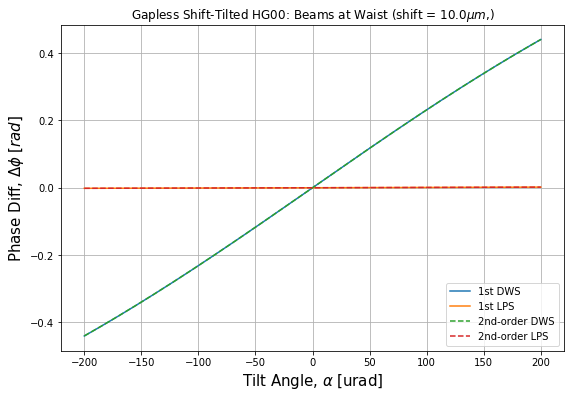

In [14]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)



#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                )
        )
    )
a=10e-6
dws=phase_diff(alpha,10e-6)
lps=gws(alpha,10e-6)

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, dws, label='1st DWS') 
plt.plot(alpha*alpha_scale, lps, label='1st LPS') 
plt.plot(alpha*alpha_scale, second_shift_dws,'--', label='2nd-order DWS') 
plt.plot(alpha*alpha_scale, second_shift_lps,'--', label='2nd-order LPS') 


plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = '+ str(a*1e6)+'$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2shift.pdf")

### Computed Deriv. 
$\frac{d \Delta \phi}{d \alpha}$

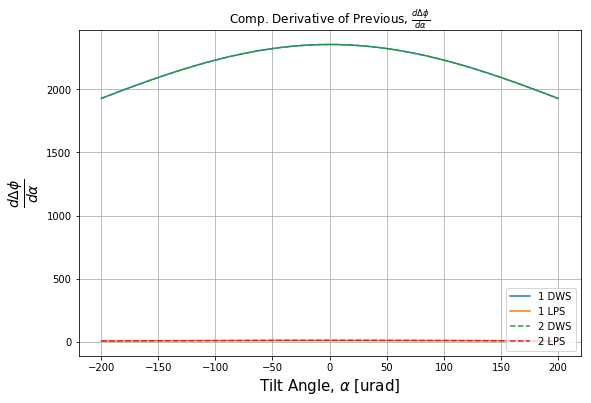

In [15]:
#function
comp_phase_diff_deriv = np.diff(second_shift_dws) / np.diff(alpha)
comp_dws_deriv = np.diff(second_shift_lps) / np.diff(alpha)
comp_phase_diff_deriv2 = np.diff(dws) / np.diff(alpha)
comp_dws_deriv2 = np.diff(lps) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv2*phase_scale, label='1 DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv2*phase_scale, label='1 LPS')
plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, '--', label='2 DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale,'--', label='2 LPS')

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative of Previous, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2shift-DER.pdf")


In [16]:
print(2*pi*a/(2*lam))

29.526246744264974


In [17]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)

#shifts
def second_order_shift_num_r(alpha,a):
    result= (
                (np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                +
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_num_l(alpha,a):
    result= (
                -(np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                -
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_den(alpha,a):
    result= (
                a**2* (3/(2*w**2))
            )
    return(result)

#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                    +
                    second_order_shift_num_r(alpha,a)
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        +
                        second_order_shift_den(alpha,a)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
                +
                second_order_shift_num_l(alpha,a)
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    +
                    second_order_shift_den(alpha,a)
                )
        )
    )

a=100e-6
second_shift_dws=phase_diff(alpha,a)
second_shift_lps=gws(alpha,a)




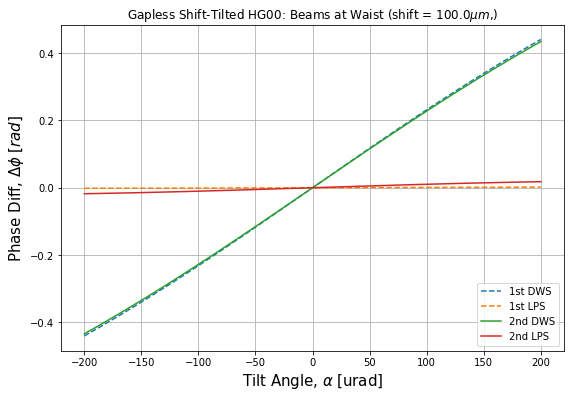

In [18]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)



#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                )
        )
    )
a=100e-6
dws=phase_diff(alpha,10e-6)
lps=gws(alpha,10e-6)

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, dws,'--', label='1st DWS') 
plt.plot(alpha*alpha_scale, lps,'--', label='1st LPS') 
plt.plot(alpha*alpha_scale, second_shift_dws, label='2nd DWS') 
plt.plot(alpha*alpha_scale, second_shift_lps, label='2nd LPS') 


plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'Gapless Shift-Tilted HG00: Beams at Waist (shift = '+ str(a*1e6)+'$\mu m$,)') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2shift.pdf")

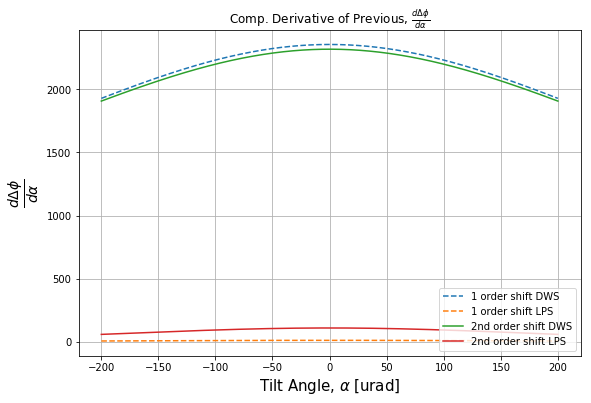

In [19]:
#function
comp_phase_diff_deriv = np.diff(second_shift_dws) / np.diff(alpha)
comp_dws_deriv = np.diff(second_shift_lps) / np.diff(alpha)
comp_phase_diff_deriv2 = np.diff(dws) / np.diff(alpha)
comp_dws_deriv2 = np.diff(lps) / np.diff(alpha)
alpha2 = (alpha[:-1] + alpha[1:]) / 2

#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv2*phase_scale,'--', label='1 order shift DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv2*phase_scale,'--', label='1 order shift LPS')
plt.plot(alpha2*alpha_scale, comp_phase_diff_deriv*phase_scale, label='2nd order shift DWS') 
plt.plot(alpha2*alpha_scale, comp_dws_deriv*phase_scale, label='2nd order shift LPS')

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'Comp. Derivative of Previous, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2shift-DER.pdf")
